# Synthetic data (dynamic barcoding)

We simulated a differentiation process over a bifurcation fork. In this simulation, 
cells are barcoded, and the barcodes could accumulate mutations, which we call 
*dynamic barcoding*. In the simulation we resample clones over time, 
like the experimental design to obtain the hematopoietic dataset 
or the reprogramming dataset. The dataset has two time points.   

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=3
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14)

Running cospar 0.0.8 (python 3.6.12) on 2021-02-17 18:23.


## Loading data

In [3]:
adata_orig=cs.datasets.synthetic_bifurcation_dynamic_BC()

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 1894 × 50
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

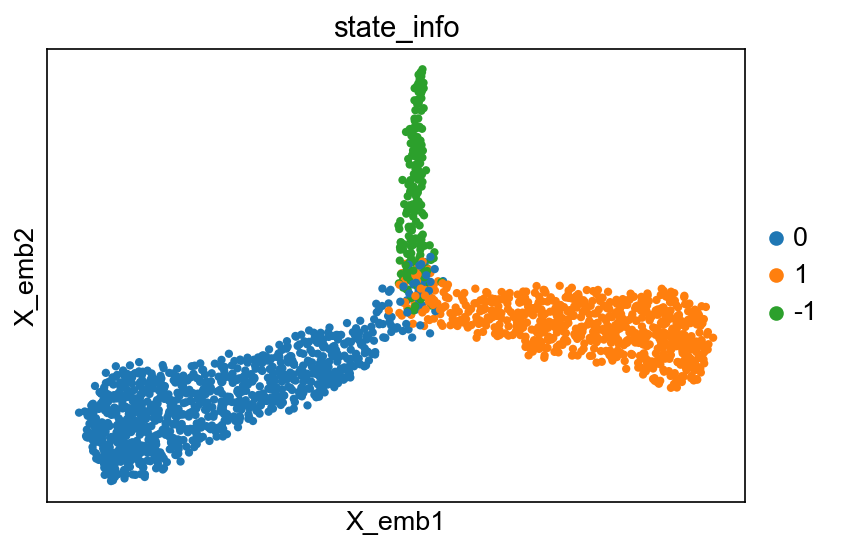

In [5]:
cs.pl.embedding(adata_orig,color='state_info')

## Raw clonal data analysis

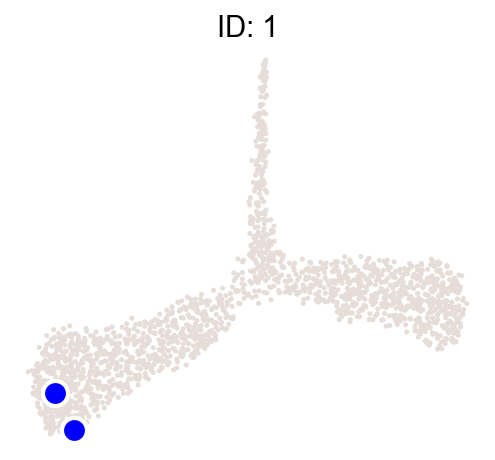

In [6]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1])

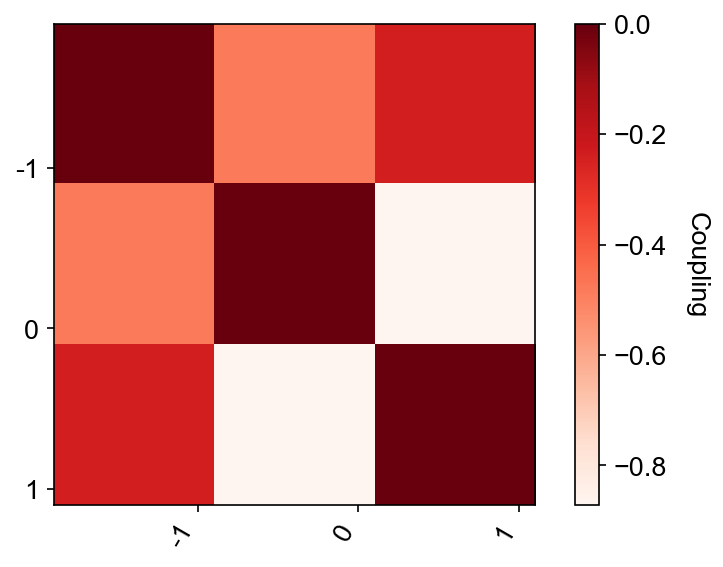

In [7]:
selected_time_point='2'
cs.pl.fate_coupling_from_clones(adata_orig,selected_time_point, selected_fates=[], color_bar=True)

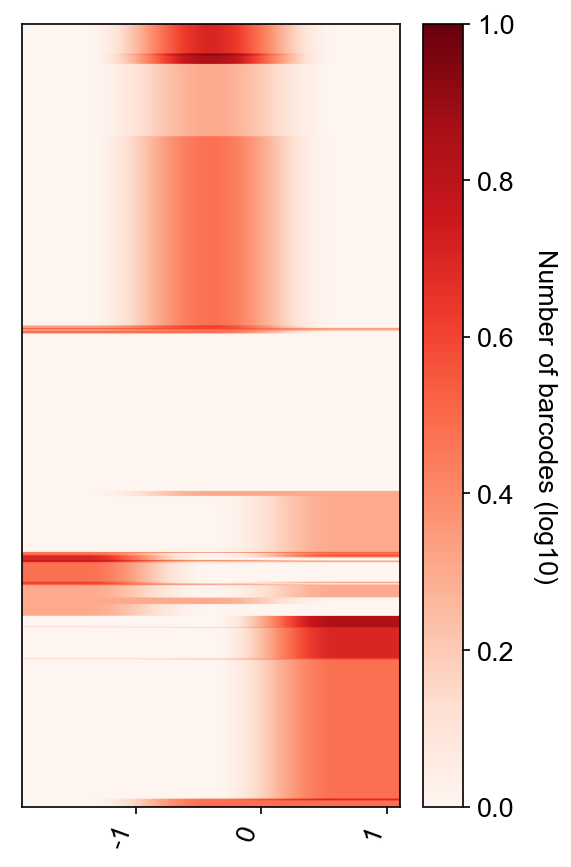

In [8]:
selected_time_point='2'
cs.pl.barcode_heatmap(adata_orig,selected_time_point, selected_fates=[], color_bar=True)

Current clone id: 0
Current clone id: 50
Current clone id: 100
Current clone id: 150
Current clone id: 200
Current clone id: 250
Current clone id: 300
Current clone id: 350
Current clone id: 400
Current clone id: 450
Current clone id: 500
Current clone id: 550
Current clone id: 600
Current clone id: 650
Current clone id: 700
Current clone id: 750
Current clone id: 800
Current clone id: 850
Current clone id: 900
Current clone id: 950
Current clone id: 1000
Current clone id: 1050
Current clone id: 1100
Current clone id: 1150


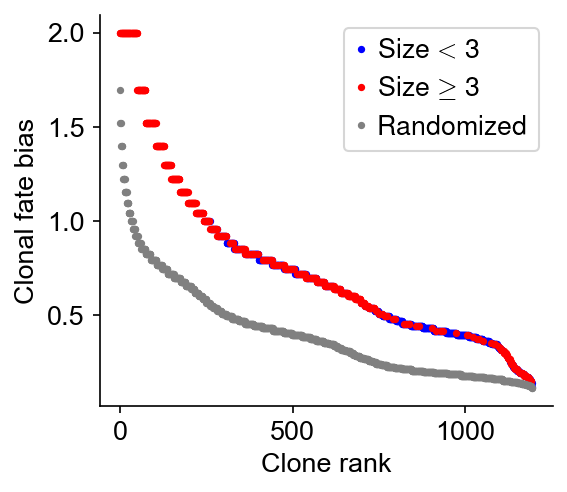

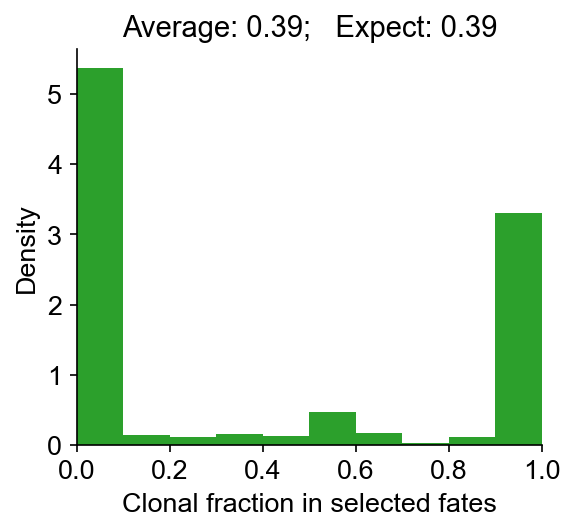

In [9]:
clonal_fate_bias,clone_id=cs.pl.clonal_fate_bias(adata_orig,selected_fate='1',N_resampling=100)

## Transition map inference

### Transition map from multiple clonal time points.

-------Step 1: Select time points---------
Current time ordering from simple sorting: ['1' '2']
--> Clonal cell fraction (day 1-2): 0.6891891891891891
--> Clonal cell fraction (day 2-1): 0.6954397394136808
--> Numer of cells that are clonally related -- day 1: 459  and day 2: 854
Valid clone number 'FOR' post selection 664
Cell number=1313, Clone number=1250
-------Step 2: Compute the full Similarity matrix if necessary---------
-------Step 3: Optimize the transition map recursively---------
---------Compute the transition map-----------
Compute similarity matrix: load existing data
--> Time elapsed:  0.0040950775146484375
--> Time elapsed:  0.016028165817260742
--> Time elapsed:  0.005628824234008789
--> Time elapsed:  0.011888265609741211
Compute similarity matrix: load existing data
--> Time elapsed:  0.0038797855377197266
--> Time elapsed:  0.014561891555786133
--> Time elapsed:  0.006256818771362305
--> Time elapsed:  0.020941972732543945
Compute similarity matrix: load existing d

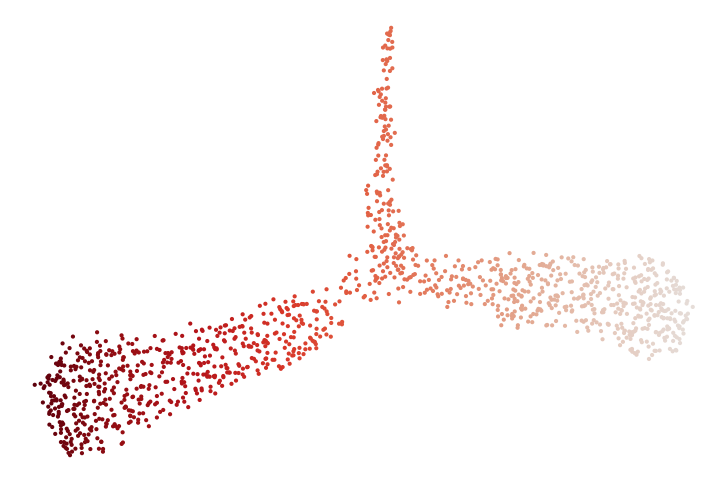

In [10]:
noise_threshold=0.2 # 
selected_clonal_time_points=['1','2']
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,selected_clonal_time_points,smooth_array=[10,10,10],
            CoSpar_KNN=20,noise_threshold=noise_threshold)

Generate demultiplexed map within each clone (Optional, as this map has been generated already)

In [11]:
run_demultiplex=False
if run_demultiplex:
    demulti_threshold=0.2 # This threshold should be smaller, ass the map has been further smoothed to expand to more states.
    cs.tmap.infer_intraclone_Tmap(adata,demulti_threshold=demulti_threshold)

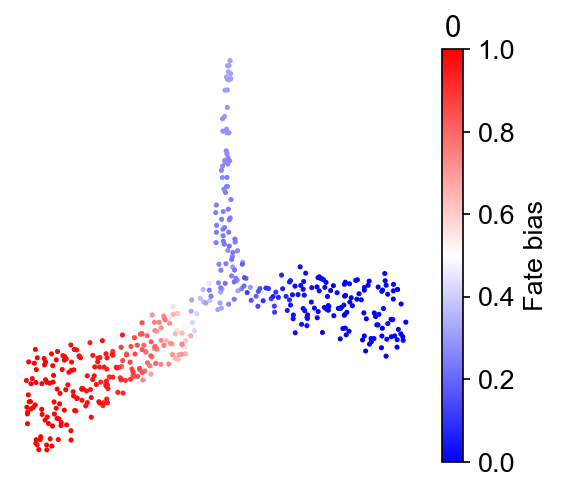

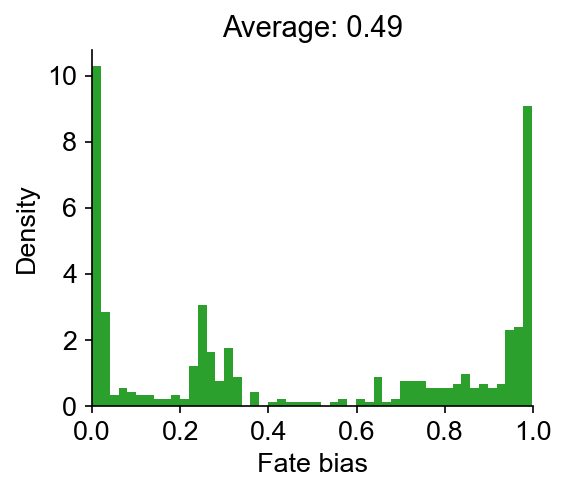

In [12]:
cs.pl.binary_fate_bias(adata,selected_fates=['0','1'],used_map_name='transition_map',
            plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)

### Transition map from a single clonal time point

In [13]:
initial_time_points=['1']
clonal_time_point='2'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points,clonal_time_point,
     Clone_update_iter_N=1,initialize_method='OT',smooth_array=[10,10,10],
                        noise_threshold=0.2,compute_new=False)

-------------------------------New Start--------------------------------------------------
Current time point: 1
-----------Pre-processing and sub-sampling cells------------
----------------
Step 1: Use OT method for initialization
Load pre-computed custon OT matrix
----------------
Step 2: Jointly optimize the transition map and the initial clonal states!
Joint optimization that consider possibility of clonal overlap: v2
--> original clone shape: (1894, 1669)
--> After excluding zero-sized clones at t2: (1894, 1334)
Sort clones by size (small to large)
Infer the number of initial cells to extract for each clone in advance
--> Inferring early clonal states: current clone id 0
--> Inferring early clonal states: current clone id 100
--> Inferring early clonal states: current clone id 200
--> Inferring early clonal states: current clone id 300
--> Inferring early clonal states: current clone id 400
--> Inferring early clonal states: current clone id 500
--> Inferring early clonal states: 

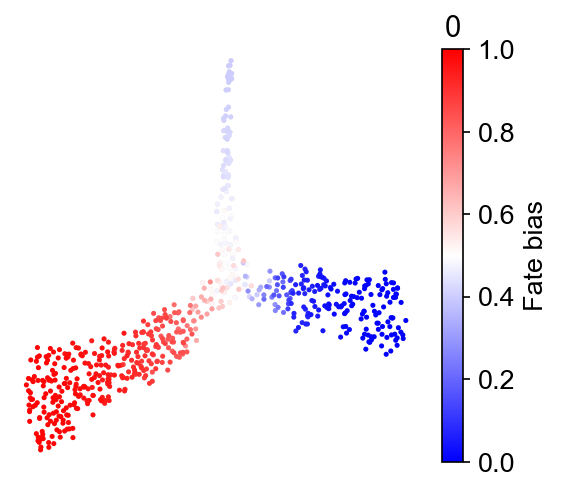

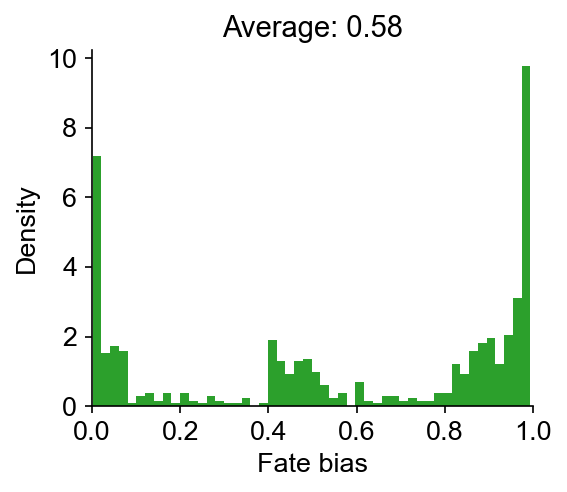

In [14]:
cs.pl.binary_fate_bias(adata,selected_fates=['0','1'],used_map_name='transition_map',
            plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)

### Transition amp from only the clonal information

Current time ordering from simple sorting: ['1' '2']
--> Clonal cell fraction (day 1-2): 0.6891891891891891
--> Clonal cell fraction (day 2-1): 0.6954397394136808
--> Numer of cells that are clonally related -- day 1: 459  and day 2: 854
Valid clone number 'FOR' post selection 664
Cell number=1894, Clone number=1250
Use all clones (naive method)


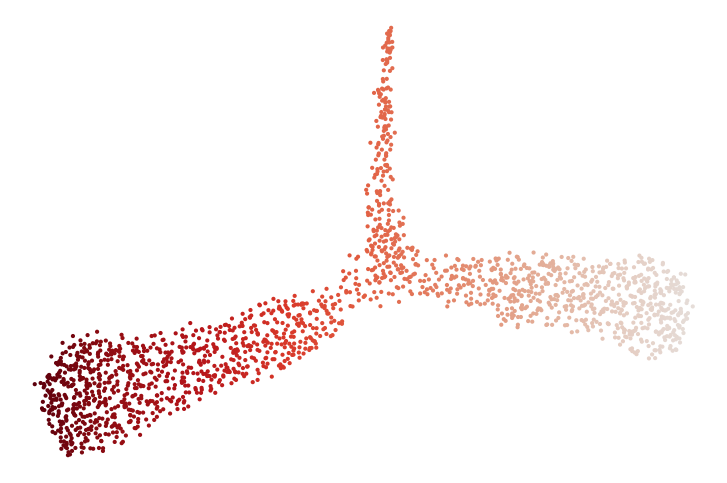

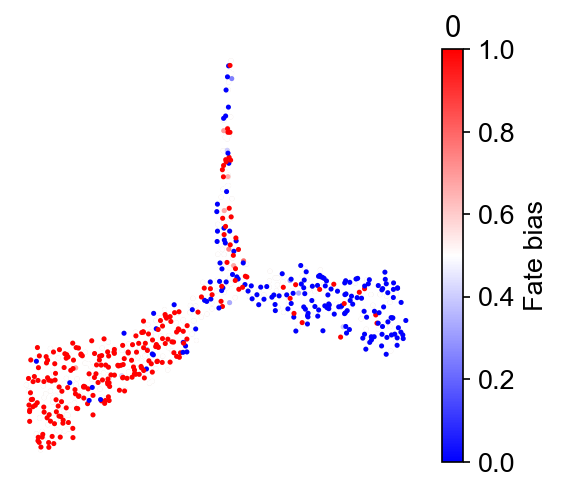

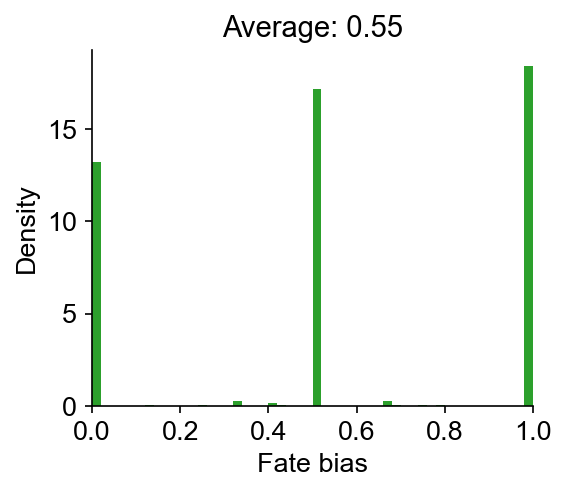

In [15]:
 cs.tmap.infer_Tmap_from_clonal_info_alone(adata)

cs.pl.binary_fate_bias(adata,selected_fates=['0','1'],used_map_name='clonal_transition_map',
            plot_target_state=False,map_backwards=True,sum_fate_prob_thresh=0)